 ε = 0.0001, C = 0.1
----MSE----
Support Vector Regression: 0.14140044969084412

----MAE----
Support Vector Regression: 0.33308952993114027

----R2 Score----
Support Vector Regression: 0.7093898544085185


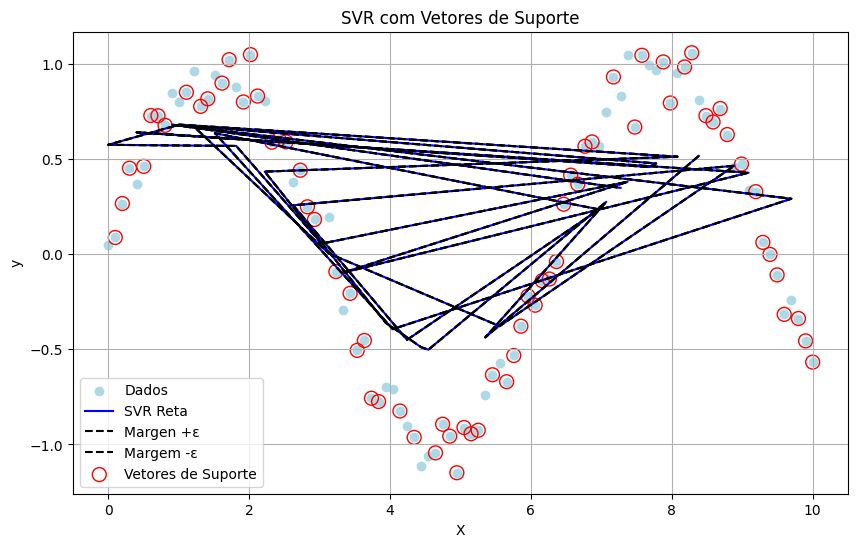

 ε = 0.0001, C = 10
----MSE----
Support Vector Regression: 0.006605603839272401

----MAE----
Support Vector Regression: 0.06932702451786418

----R2 Score----
Support Vector Regression: 0.9864239788653593


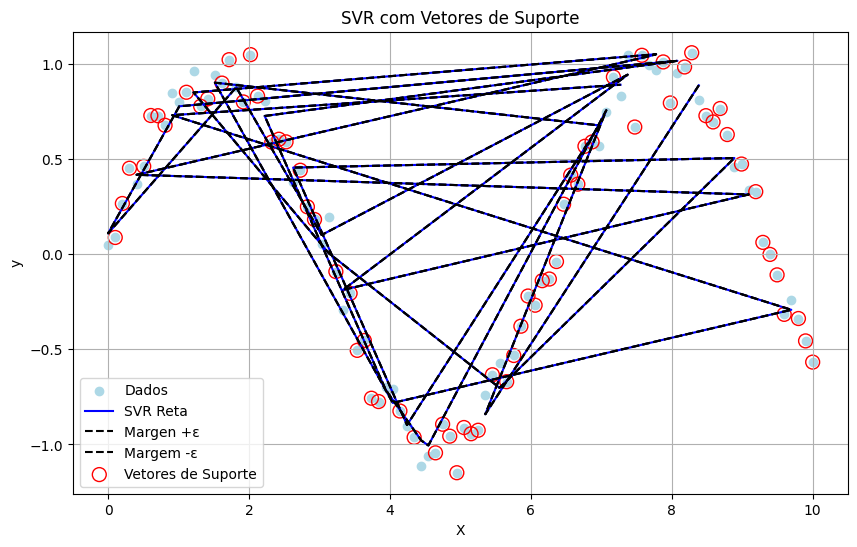

 ε = 0.0001, C = 100
----MSE----
Support Vector Regression: 0.006560841105565014

----MAE----
Support Vector Regression: 0.06937222080663984

----R2 Score----
Support Vector Regression: 0.9865159764833882


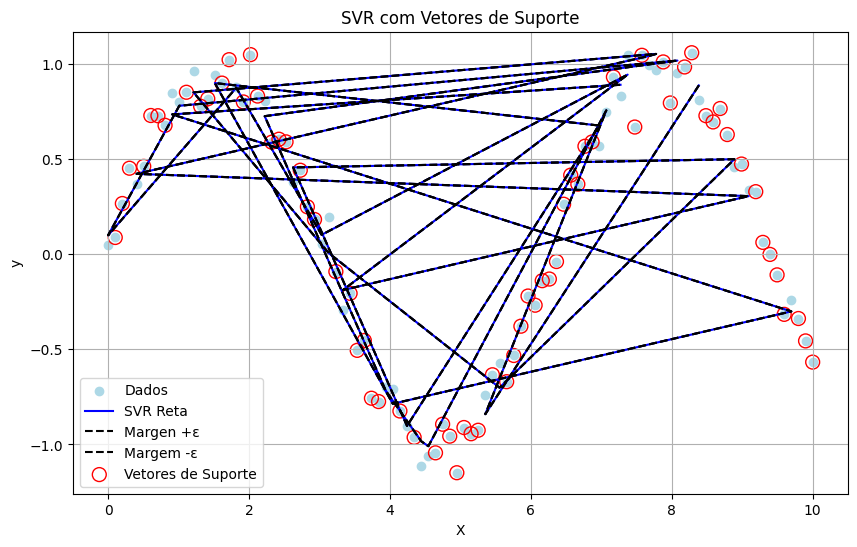

 ε = 0.1, C = 0.1
----MSE----
Support Vector Regression: 0.14323449657871415

----MAE----
Support Vector Regression: 0.34026646162180857

----R2 Score----
Support Vector Regression: 0.7056204701224654


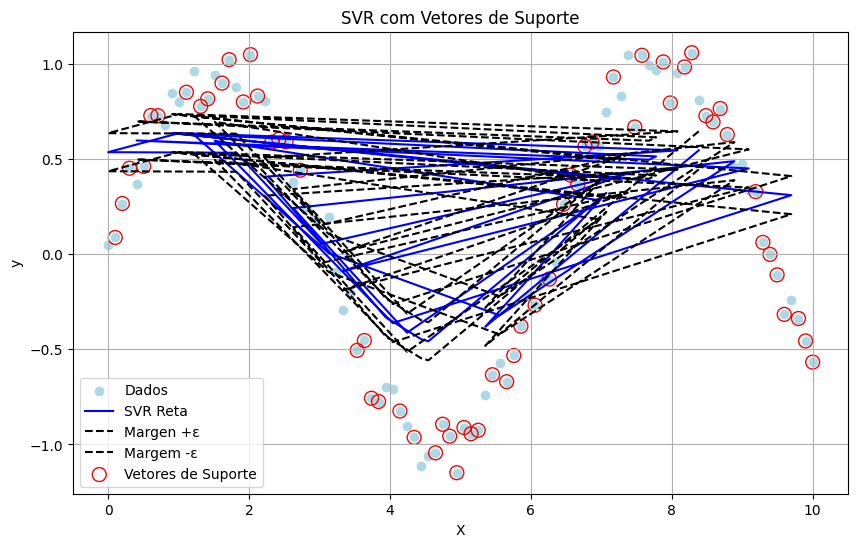

 ε = 0.1, C = 10
----MSE----
Support Vector Regression: 0.0058086500992890035

----MAE----
Support Vector Regression: 0.059534152784677656

----R2 Score----
Support Vector Regression: 0.9880619004060094


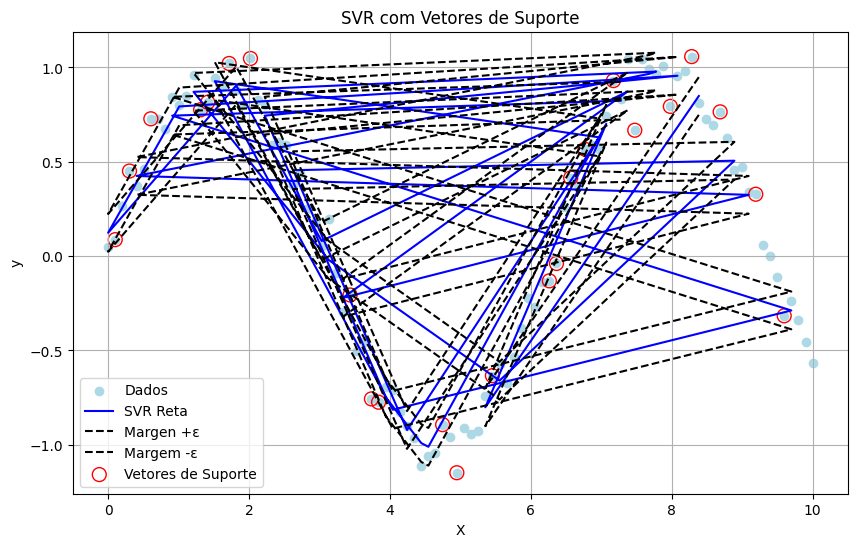

 ε = 0.1, C = 100
----MSE----
Support Vector Regression: 0.005844317151847537

----MAE----
Support Vector Regression: 0.061007354828654506

----R2 Score----
Support Vector Regression: 0.98798859648541


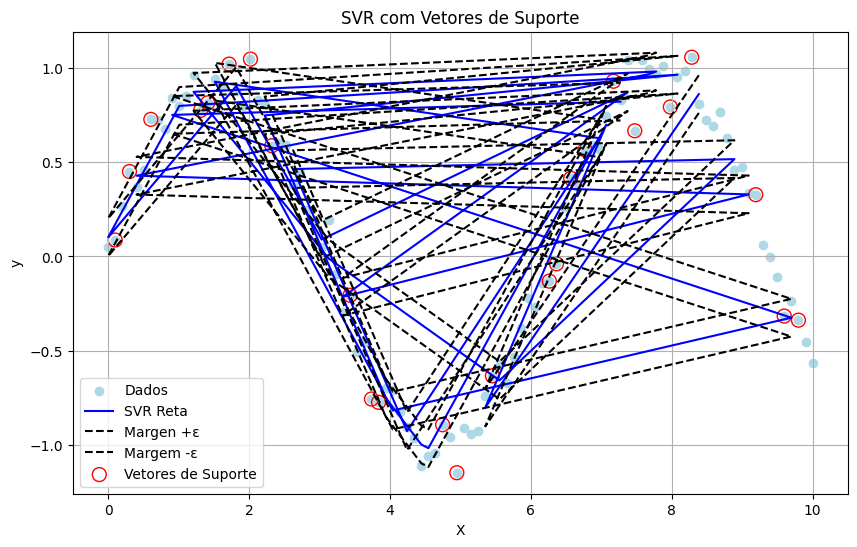

 ε = 1, C = 0.1
----MSE----
Support Vector Regression: 0.4942004180725034

----MAE----
Support Vector Regression: 0.6384889505871303

----R2 Score----
Support Vector Regression: -0.015694474532642166


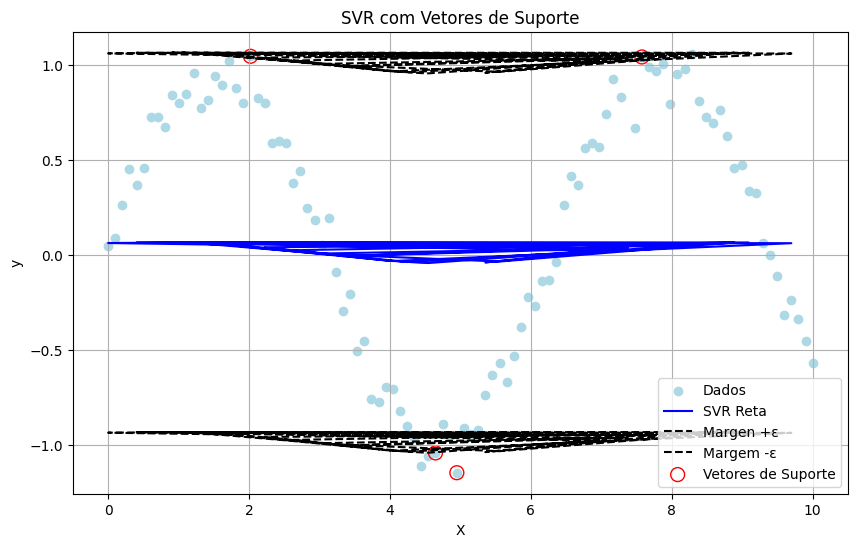

 ε = 1, C = 10
----MSE----
Support Vector Regression: 0.45702008156511054

----MAE----
Support Vector Regression: 0.6153804053814881

----R2 Score----
Support Vector Regression: 0.06071958941961242


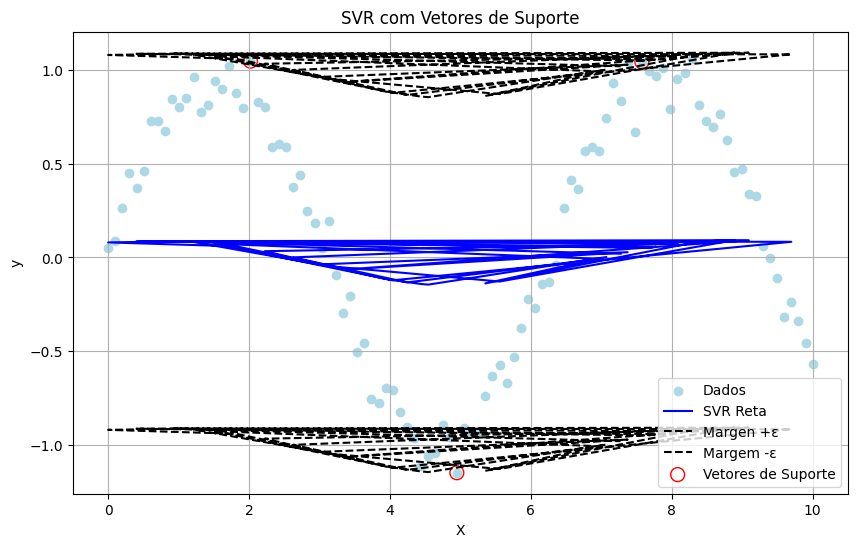

 ε = 1, C = 100
----MSE----
Support Vector Regression: 0.45702008156511054

----MAE----
Support Vector Regression: 0.6153804053814881

----R2 Score----
Support Vector Regression: 0.06071958941961242


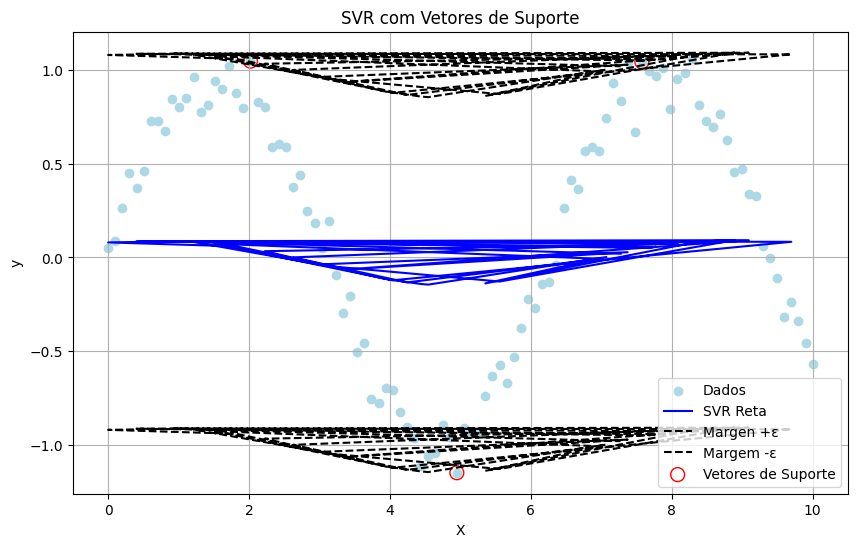

 ε = 10000, C = 0.1
----MSE----
Support Vector Regression: 0.5769529222679982

----MAE----
Support Vector Regression: 0.6950579703020676

----R2 Score----
Support Vector Regression: -0.18576972779309653


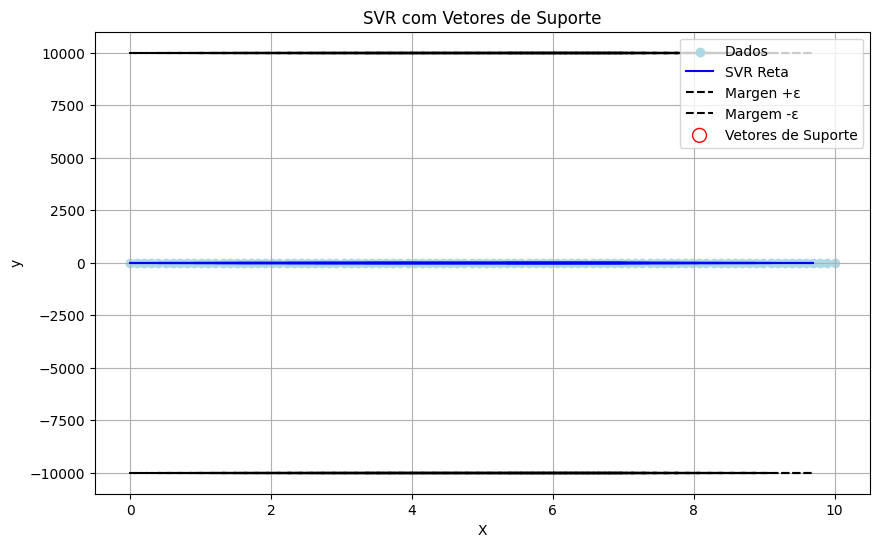

 ε = 10000, C = 10
----MSE----
Support Vector Regression: 0.5769529222679982

----MAE----
Support Vector Regression: 0.6950579703020676

----R2 Score----
Support Vector Regression: -0.18576972779309653


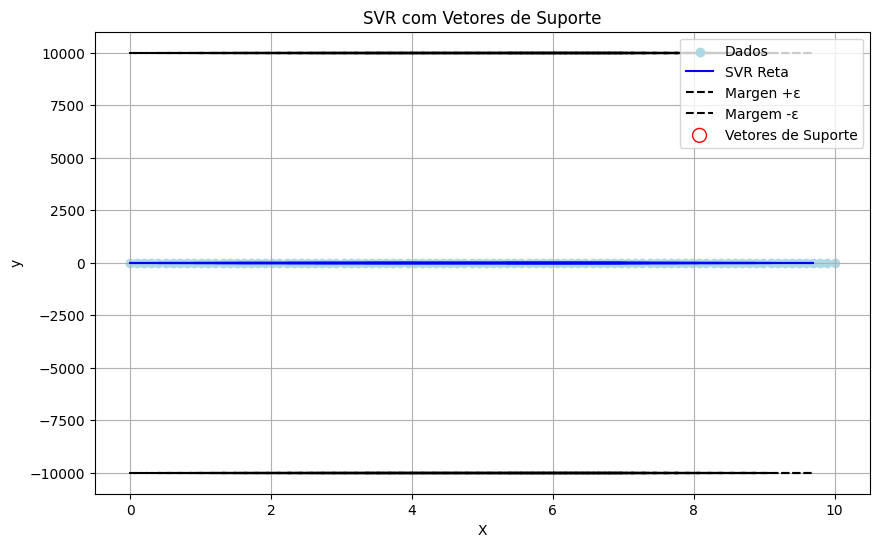

 ε = 10000, C = 100
----MSE----
Support Vector Regression: 0.5769529222679982

----MAE----
Support Vector Regression: 0.6950579703020676

----R2 Score----
Support Vector Regression: -0.18576972779309653


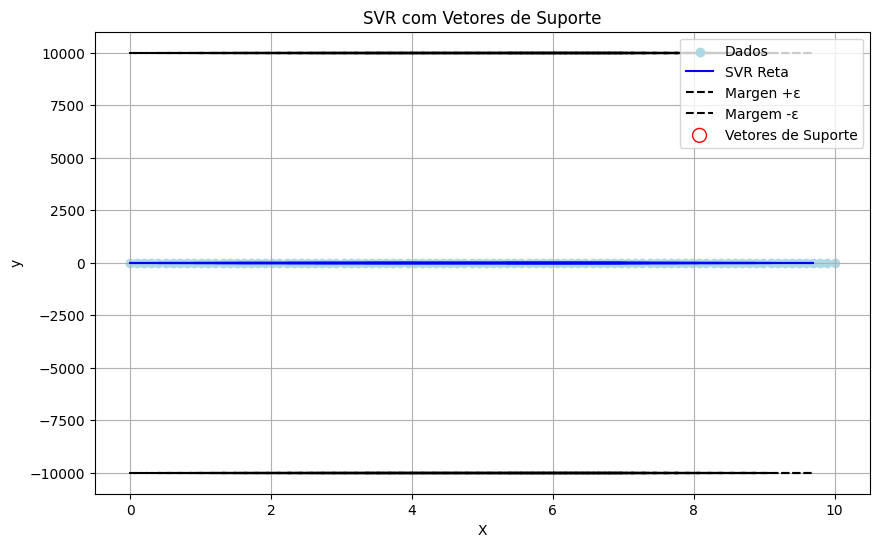

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from helpers import synthetic_data


epsilons = (0.0001, 0.1, 1, 10000)
C_s = (0.1, 10, 100)

X, y = synthetic_data.generate_nonlinear_data(np.sin, noise_std=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for epsilon in epsilons:
    for C in C_s:
        svr = SVR(kernel="rbf", C=C, epsilon=epsilon)
        svr.fit(X_train, y_train)
        y_pred = svr.predict(X_test)

        print(f" ε = {epsilon}, C = {C}")

        print("----MSE----")
        print(f"Support Vector Regression: {mean_squared_error(y_test, y_pred)}")

        print("\n----MAE----")
        print(f"Support Vector Regression: {mean_absolute_error(y_test, y_pred)}")

        print("\n----R2 Score----")
        print(f"Support Vector Regression: {r2_score(y_test, y_pred)}")

        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color="lightblue", label="Dados")
        plt.plot(X_test, y_pred, color="blue", label="SVR Reta")
        plt.plot(X_test, y_pred + epsilon, "k--", label="Margen +ε")
        plt.plot(X_test, y_pred - epsilon, "k--", label="Margem -ε")

        plt.scatter(
            X_train[svr.support_],
            y_train[svr.support_],
            facecolors='none',
            edgecolors='red',
            s=100,
            label="Vetores de Suporte"
        )

        plt.xlabel("X")
        plt.ylabel("y")
        plt.title("SVR com Vetores de Suporte")
        plt.legend()
        plt.grid(True)
        plt.show()


<h2>
O que acontece se ε for muito pequeno ou muito grande?
</h2>

> Usando ε muito grande, a margem de tolerância ao erro é ampliada, fazendo com que todos os pontos fiquem dentro da margem e, consequentemente, tenha menos vetores de suporte. Assim, o modelo fica menos sensível às variações nos dados, o que pode gerar underfitting.

> Usando ε muito pequeno, a margem de tolerância ao erro é reduzida, o que faz com que tenha muitos vetores de suporte. O modelo se ajusta muito aos dados, o que pode causar overfitting.

<h2>
Como o SVR lida com outliers nesse contexto?
</h2>

> O SVR lida com outliers permitindo que eles fiquem fora da margem, mas penalizando os erros de forma controlada. Se o parâmetro C for alto, o modelo tenta se ajustar aos outliers, se for baixo, ele os ignora. Agora, para o parâmetro ε, se ele for maior, o modelo ignora os outliers (mas não outliers extremos), com o epsilon menor, o modelo se torna mais sensível a eles. Dessa forma, o SVR é moderadamente robusto a outliers, dependendo da escolha de ε e C.